In [1]:
# 각각의 데이터들을 샘플이라고 부른다. 이 샘플들의 길이, 무게 등은 특성(속성)이라고 한다.
apple_length = [5.4, 6.3, 6.5, 9.0, 9.0, 9.7, 9.7, 10.0, 10.0, 10.7, 11.0, 11.0, 11.5, 12.0, 12.0, 12.0, 13.0, 13.0, 13.5, 13.5,
                14.0,14.0, 14.5, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 17.0, 18.5, 18.5, 19.5, 11.0, 11.0]
apple_weight = [24.0, 29.0, 34.0, 36.0, 43.0, 45.0, 50.0, 49.0, 45.0, 50.0, 47.0, 50.0, 50.0, 44.0, 60.0, 60.0, 70.0, 70.0, 61.0, 65.0, 
                57.0,68.0, 62.0, 68.0, 70.0, 72.0, 72.0, 71.0, 85.0, 90.0, 92.0, 95.0, 92.0, 57.0, 55.0]

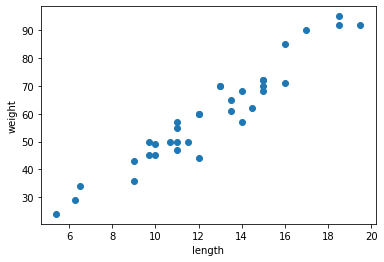

In [2]:
# 샘플을 이용한 산점도
import matplotlib.pyplot as plt

plt.scatter(apple_length, apple_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
plum_length = [1.8, 2.5, 2.6, 2.0, 2.2, 2.3, 2.8, 2.8, 2.0, 2.2, 2.4, 2.0, 2.3, 2.0]
plum_weight = [1.7, 2.0, 2.0, 1.7, 2.8, 1.7, 2.1, 2.3, 1.8, 2.2, 1.9, 2.2, 2.3, 1.9]

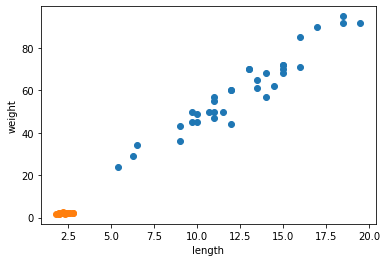

In [4]:
# 산점도를 두개 연속으로 쓰면 합쳐준다.
plt.scatter(apple_length,apple_weight)
plt.scatter(plum_length,plum_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

두 개의 데이터를 하나의 데이터로 합친다.


In [6]:
# 리스트 변수의 덧셈연산은 두 리스트를 합쳐 하나의 리스트로 만든다.
# 연산자 오버로딩
length = apple_length + plum_length
weight = apple_weight + plum_weight

In [7]:
# 사이킷런이 기대하는 데이터 형태로 가공
# 리스트의 리스트, 2차원 배열
# List comprehension을 사용
fruit_data = [[l,w] for l,w in zip(length, weight)]

In [8]:
print(fruit_data)

[[5.4, 24.0], [6.3, 29.0], [6.5, 34.0], [9.0, 36.0], [9.0, 43.0], [9.7, 45.0], [9.7, 50.0], [10.0, 49.0], [10.0, 45.0], [10.7, 50.0], [11.0, 47.0], [11.0, 50.0], [11.5, 50.0], [12.0, 44.0], [12.0, 60.0], [12.0, 60.0], [13.0, 70.0], [13.0, 70.0], [13.5, 61.0], [13.5, 65.0], [14.0, 57.0], [14.0, 68.0], [14.5, 62.0], [15.0, 68.0], [15.0, 70.0], [15.0, 72.0], [15.0, 72.0], [16.0, 71.0], [16.0, 85.0], [17.0, 90.0], [18.5, 92.0], [18.5, 95.0], [19.5, 92.0], [11.0, 57.0], [11.0, 55.0], [1.8, 1.7], [2.5, 2.0], [2.6, 2.0], [2.0, 1.7], [2.2, 2.8], [2.3, 1.7], [2.8, 2.1], [2.8, 2.3], [2.0, 1.8], [2.2, 2.2], [2.4, 1.9], [2.0, 2.2], [2.3, 2.3], [2.0, 1.9]]


In [9]:
len(fruit_data)

49

In [10]:
# 정답을 준비해야한다. - 지도학습
fruit_target = [1]*35 + [0]*14

머신러닝은 문자를 직접적으로 이해하지 못한다.
<br>사과와 자두를 각각 컴퓨터가 이해할 수 있는 숫자인 1과 0으로 표현을 했다.<br>
사이킷 런 등 머신러닝 라이브러리는 2개의 클래스 중 하나를 고르는 경우 **2진분류**를 사용한다.<br>
이 때 찾으려는 대상을 1로두고, 이외의 대상은 0으로 둔다.


In [11]:
# k-Nearest Neighbors (k-최근접 이웃)

from sklearn.neighbors import KNeighborsClassifier
kn =  KNeighborsClassifier() # Class의 객체를 만든다. - kn을 모델이라고 한다.
kn.fit(fruit_data, fruit_target) # 이 두 데이터를 가지고 머신러닝 모델을 분류
kn.score(fruit_data,fruit_target)# 얼마만큼 학습했는지 알아보기 위함.
# 1.0이면 100% 다 맞췄다는 것을 뜻한다.(정확도)

1.0

**새로운 과일 데이터 예측**

In [13]:
# 길이가 15.1이고 무게가 65.0인 과일 - 사과
kn.predict([[15.1,65.0]])
# fit(2차원 배열 리스트)를 주었기 때문에 2차원 배열로 값을 주어야 함

array([1])

array([1]) --> 사과임을 예측함<br>
array값으로 반환되는 이유는 사이킷런이 ndarray 타입으로 반환하기 때문
<br><br><br>
k-최근접이웃은 주변에 있는 k개의 샘플을 보고 가장 가까운 애들을 답으로 내놓는다.<br>
예측하고자 하는 데이터에 가까운 데이터가 3개가 사과고 2개가 자두라면 k-최근접 이웃은 사과라고 예측하는 방식이다.(k의 디폴트값은 5이다.)

In [14]:
# 주변에 바라보는 샘플은 n_neighbors라는 매개변수를 통해 설정할 수 있다.
# 무조건 사과라고 예측하는 프로그램을 만들어보자. - 전체샘플을 다 바라보는 프로그램
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fruit_data, fruit_target)
kn49.score(fruit_data,fruit_target)

0.7142857142857143

In [15]:
print(35/49)

0.7142857142857143
